# Exploratory Data Analysis

Hier wird der Datensatz grob analysiert, um eine Überblick der Daten zu bekommen.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv ('../dataset/train.csv', index_col='Id')
df.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,...,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal,69700.0
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,...,Du,Du,J,NaN,0.0,6,2017,GarK,Normal,133450.0
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,...,Du,Du,P,NaN,0.0,9,2016,GarK,Normal,165750.0
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,...,Du,Du,J,NaN,0.0,5,2017,GarK,Normal,157250.0
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,...,Du,Du,J,NaN,0.0,6,2016,GarK,Normal,195500.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wohngebiet                   1997 non-null   object 
 1   Nachbarschaft                2000 non-null   object 
 2   Bedingung1                   2000 non-null   object 
 3   Bedingung2                   2000 non-null   object 
 4   Wohnungsklasse               2000 non-null   int64  
 5   Gebauedetyp                  2000 non-null   object 
 6   Wohnungsstil                 2000 non-null   object 
 7   Baujahr                      2000 non-null   int64  
 8   Umbaujahr                    2000 non-null   int64  
 9   Hausqualitaet                2000 non-null   int64  
 10  Hauszustand                  2000 non-null   int64  
 11  Versorgung                   1998 non-null   object 
 12  Grundstuecksgroesse          2000 non-null   float64
 13  Grundstuecksform       

In [6]:
print(df.describe())

       Wohnungsklasse      Baujahr    Umbaujahr  Hausqualitaet  Hauszustand   
count     2000.000000  2000.000000  2000.000000    2000.000000  2000.000000  \
mean        57.337500  1981.358500  1994.088500       6.089000     5.553500   
std         42.991252    30.349374    21.045454       1.408215     1.094412   
min         20.000000  1882.000000  1960.000000       1.000000     1.000000   
25%         20.000000  1963.000000  1975.000000       5.000000     5.000000   
50%         50.000000  1983.000000  2003.000000       6.000000     5.000000   
75%         70.000000  2011.000000  2014.000000       7.000000     6.000000   
max        190.000000  2020.000000  2020.000000      10.000000     9.000000   

       Grundstuecksgroesse  Strassenlaenge  Mauerwerkflaeche   
count          2000.000000     1662.000000       1986.000000  \
mean            912.937905       20.684477          9.060906   
std             738.556922        6.944439         15.776509   
min             117.000000      

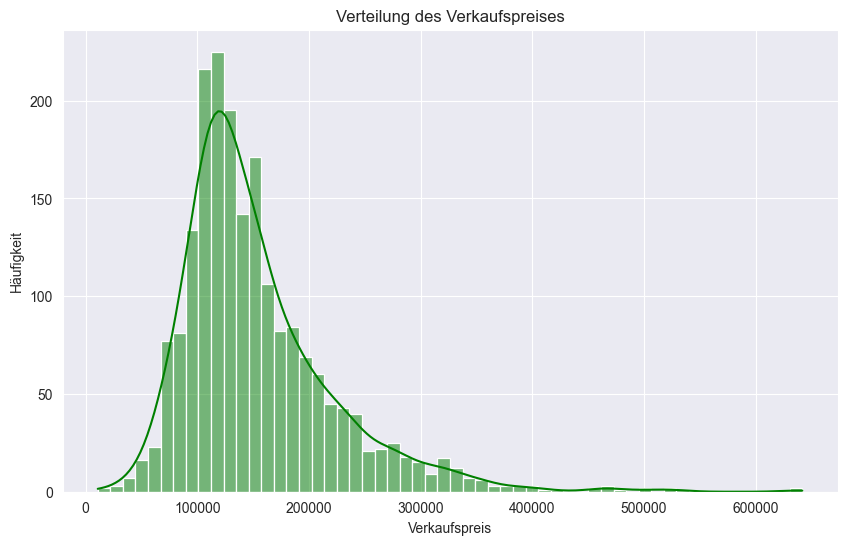

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Verkaufspreis'], kde=True, color='green')
plt.title('Verteilung des Verkaufspreises')
plt.xlabel('Verkaufspreis')
plt.ylabel('Häufigkeit')
plt.show()

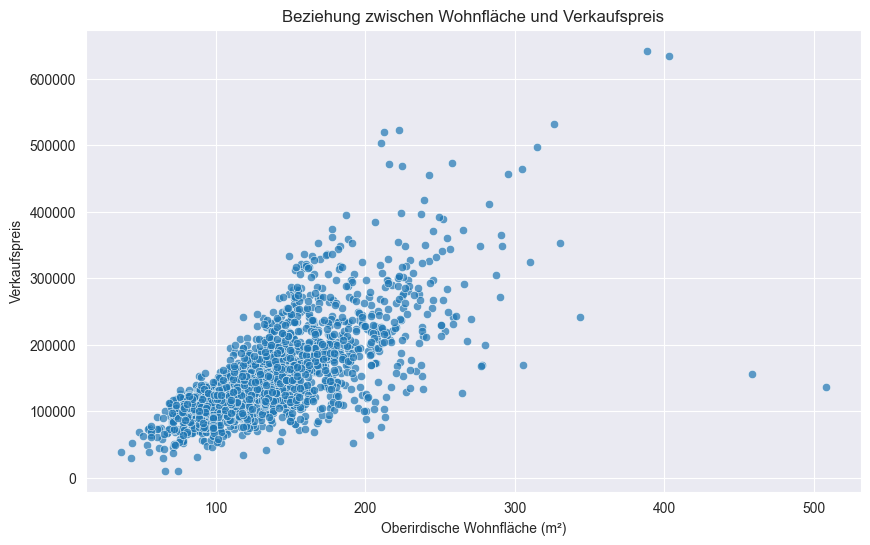

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OberirdischeWohnflaeche', y='Verkaufspreis', data=df, alpha=0.7)
plt.title('Beziehung zwischen Wohnfläche und Verkaufspreis')
plt.xlabel('Oberirdische Wohnfläche (m²)')
plt.ylabel('Verkaufspreis')
plt.show()

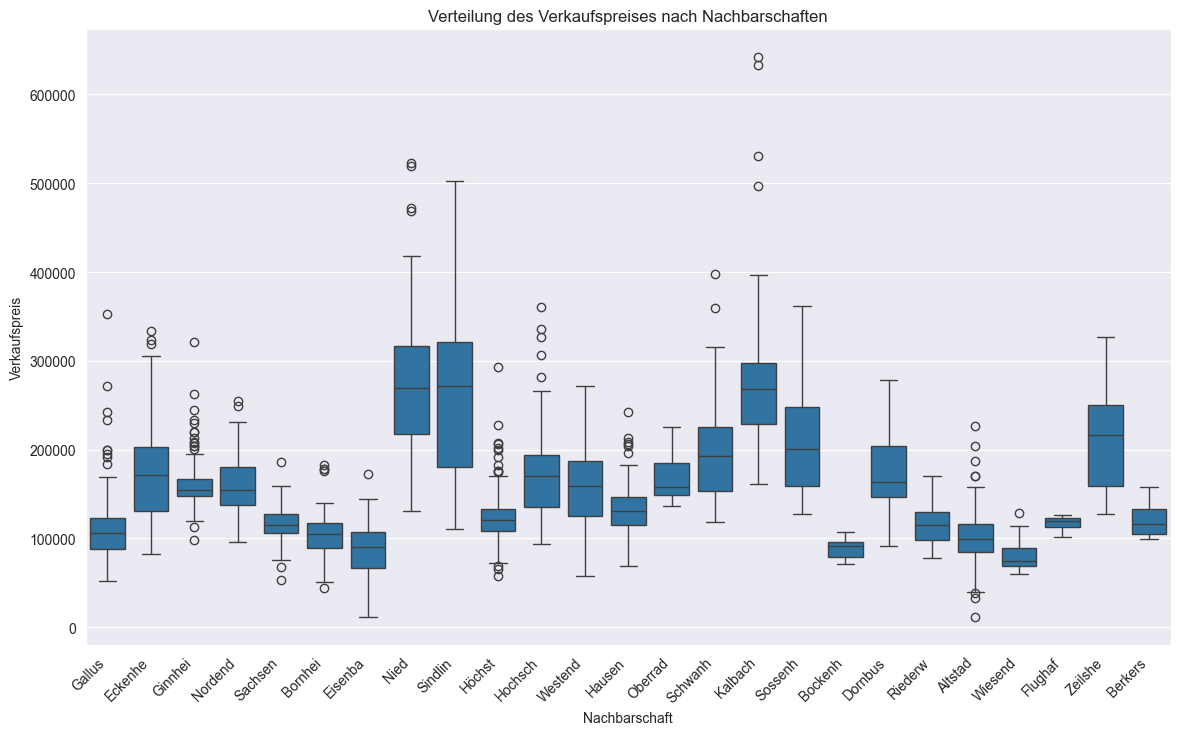

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Nachbarschaft', y='Verkaufspreis', data=df)
plt.title('Verteilung des Verkaufspreises nach Nachbarschaften')
plt.xlabel('Nachbarschaft')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha='right')
plt.show()

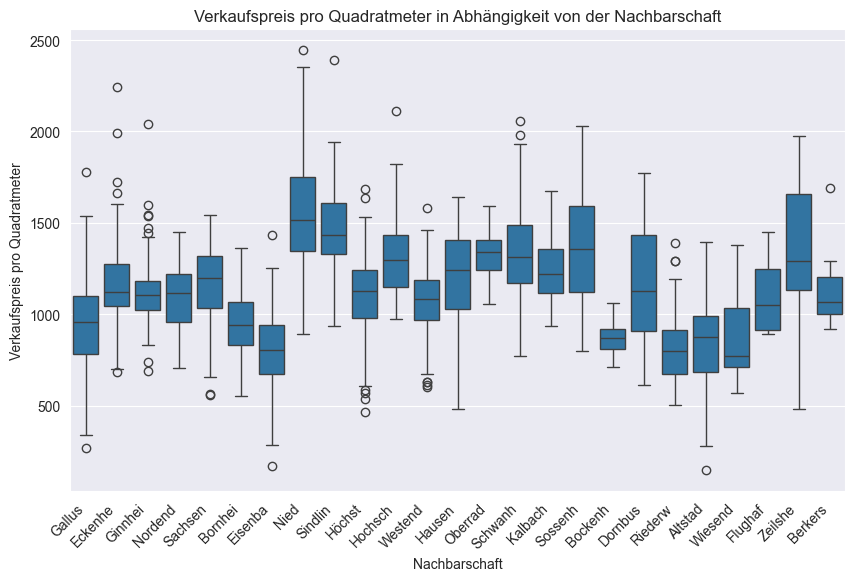

In [10]:
df['Preis_pro_qm'] = df['Verkaufspreis'] / df['OberirdischeWohnflaeche']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Nachbarschaft', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von der Nachbarschaft')
plt.xlabel('Nachbarschaft')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

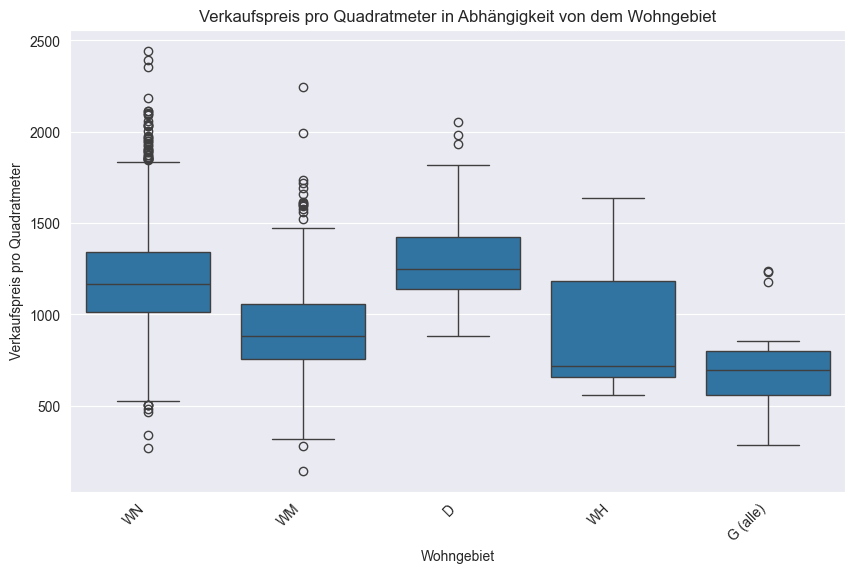

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wohngebiet', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von dem Wohngebiet')
plt.xlabel('Wohngebiet')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

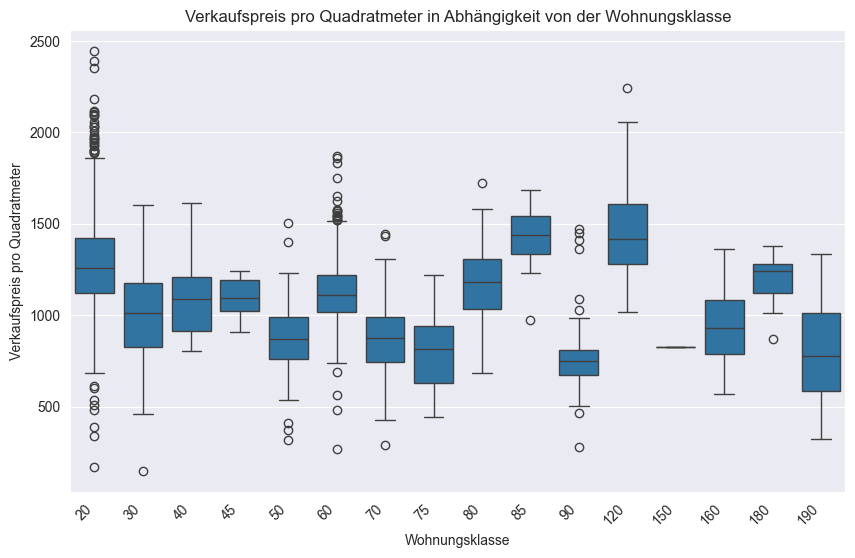

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wohnungsklasse', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von der Wohnungsklasse')
plt.xlabel('Wohnungsklasse')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

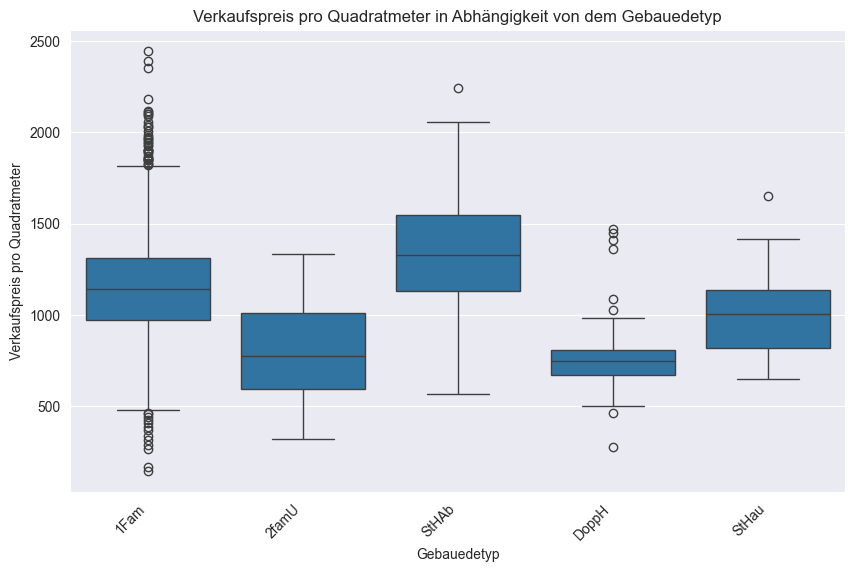

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gebauedetyp', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von dem Gebauedetyp')
plt.xlabel('Gebauedetyp')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

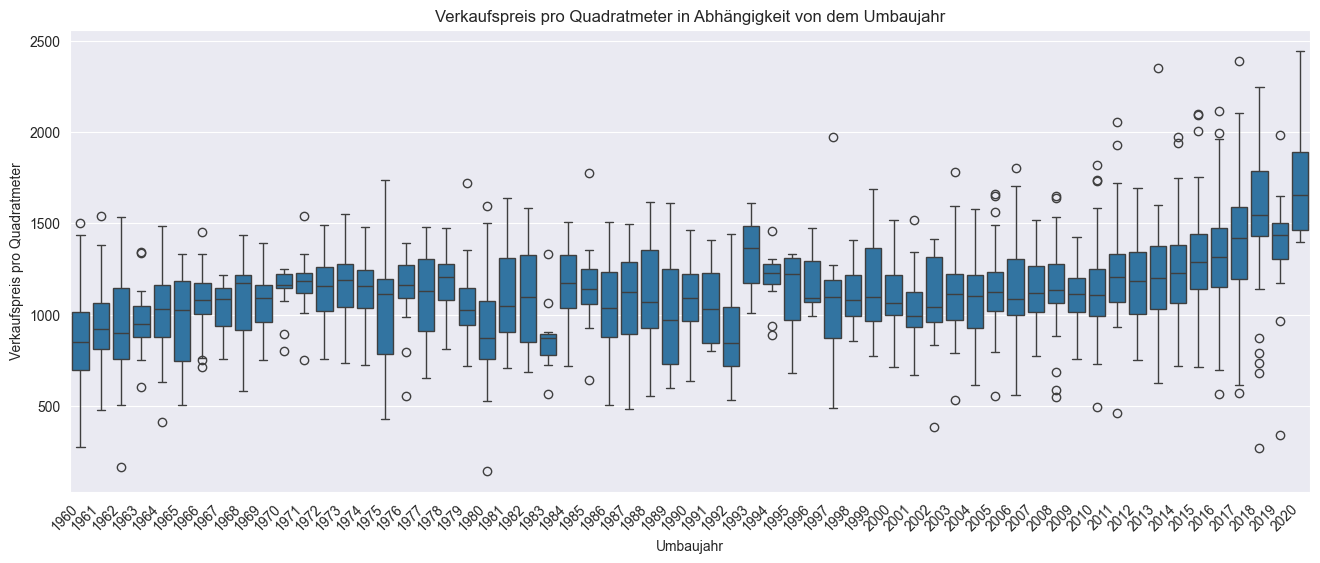

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Umbaujahr', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von dem Umbaujahr')
plt.xlabel('Umbaujahr')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

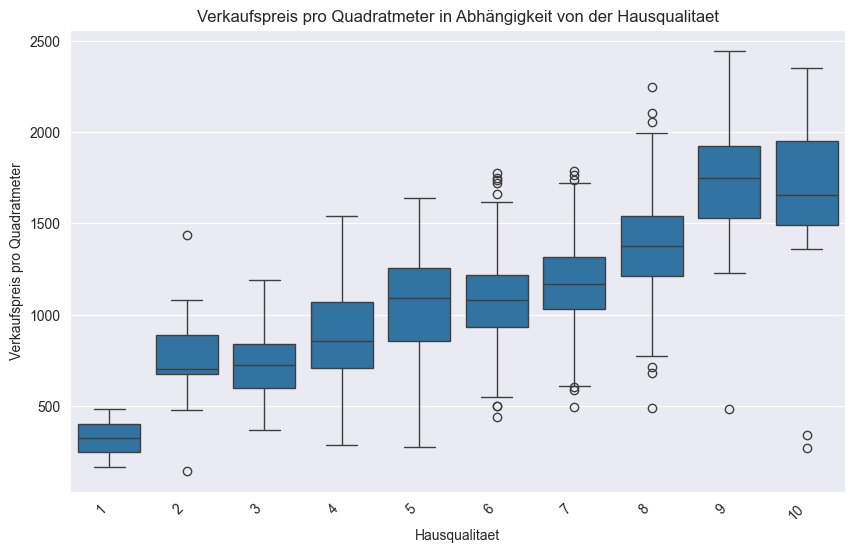

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hausqualitaet', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von der Hausqualitaet')
plt.xlabel('Hausqualitaet')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

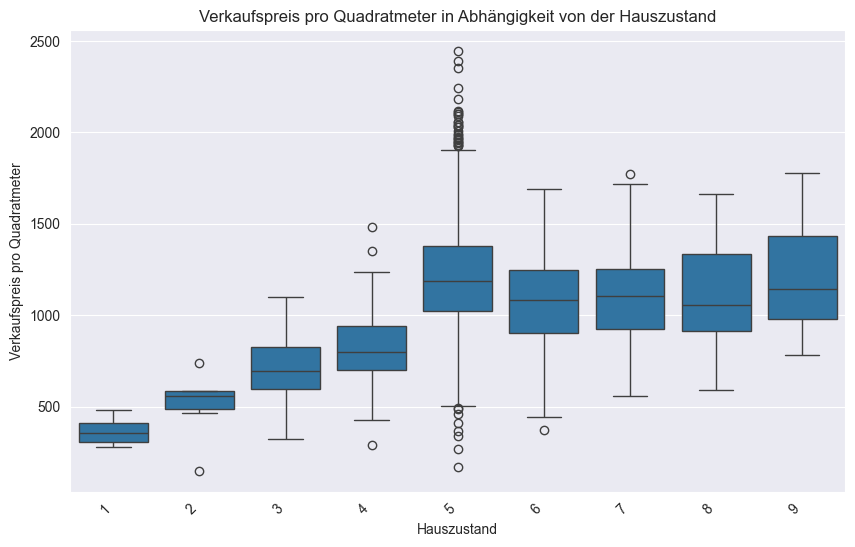

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hauszustand', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von der Hauszustand')
plt.xlabel('Hauszustand')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

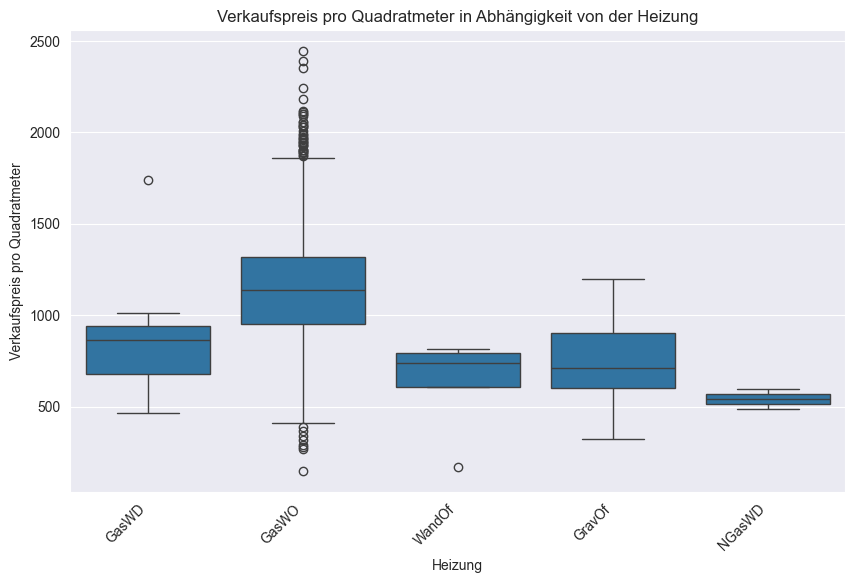

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heizung', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von der Heizung')
plt.xlabel('Heizung')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()

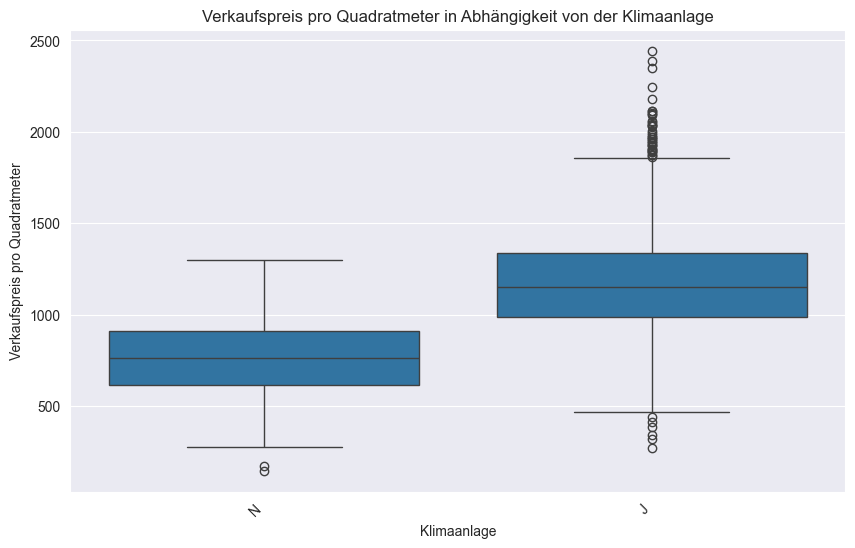

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Klimalanlage', y='Preis_pro_qm', data=df)
plt.title('Verkaufspreis pro Quadratmeter in Abhängigkeit von der Klimaanlage')
plt.xlabel('Klimaanlage')
plt.ylabel('Verkaufspreis pro Quadratmeter')
plt.xticks(rotation=45, ha='right')
plt.show()